Accuracy on test set: 1.0

Classification Report on test set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       974
           1       1.00      1.00      1.00      1820
           2       1.00      1.00      1.00      2406

    accuracy                           1.00      5200
   macro avg       1.00      1.00      1.00      5200
weighted avg       1.00      1.00      1.00      5200


Confusion Matrix on test set:
[[ 974    0    0]
 [   0 1820    0]
 [   0    0 2406]]

Accuracy on new dataset (df_new): 1.0

Confusion Matrix on new dataset:
[[ 4804     0     0]
 [    0  8748     0]
 [    0     0 12448]]


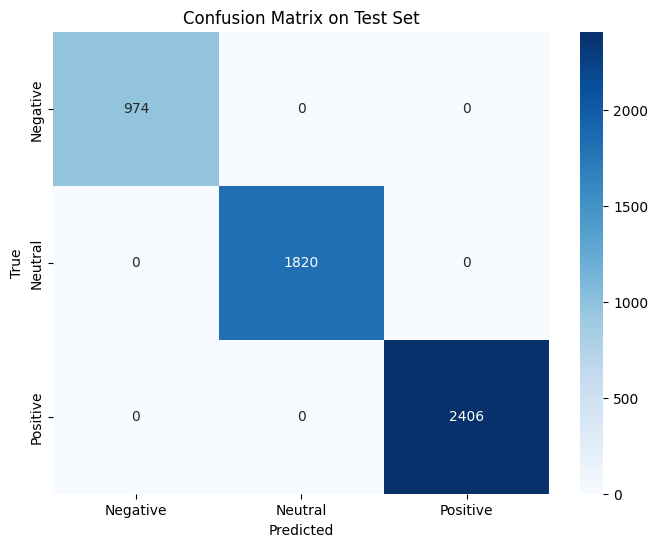

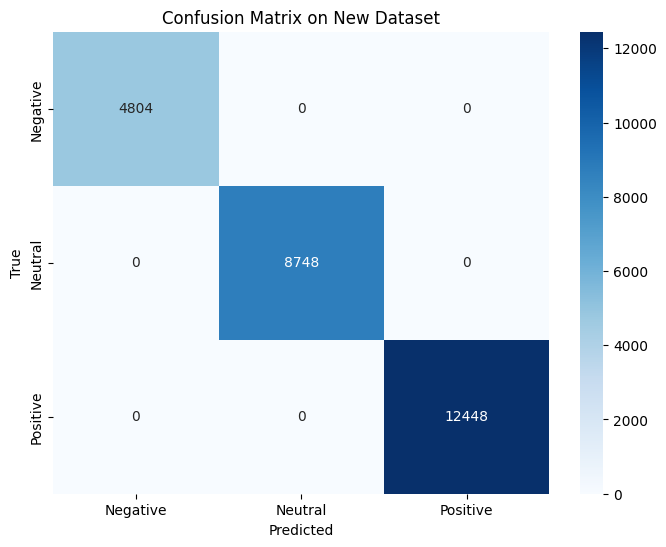

In [18]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight

# Load in the datasets
df = pd.read_csv("/Users/arnavmandal/PycharmProjects/nlp_project/.venv/data.csv", encoding="ISO-8859-1", header=None)
df_unseen = pd.read_csv("/Users/arnavmandal/PycharmProjects/nlp_project/.venv/stock_news.csv", header=None)

# Rename columns
df.columns = ["Sentiment", "Text"]
df_unseen.columns = ["index", "Text", "Sentiment"]


# Drop unnecessary columns and rows
df_unseen.drop("index", axis=1, inplace=True)
df_unseen.drop(0, axis=0, inplace=True)

# Drop missing values and duplicates
df.dropna(inplace=True)
df_unseen.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df_unseen.drop_duplicates(inplace=True)

# Preprocessing function using spaCy
nlp = spacy.load("en_core_web_sm")
def preprocess_text(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

# Apply preprocessing to both datasets
df["Text"] = df["Text"].apply(preprocess_text)
df_unseen["Text"] = df_unseen["Text"].apply(preprocess_text)
# Clean and label e
label_encoder = LabelEncoder()
df_new['Processed_Headline'] = label_encoder.fit_transform(df_new['Processed_Headline'])

# Step 2: Splitting the dataset into training and testing sets
X = df_new['Headline']
y = df_new['Processed_Headline']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: TF-IDF Vectorization
# Apply TF-IDF vectorization to the training data
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 4: Handle class imbalance with SMOTE (if applicable)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Step 5: Random Forest Classifier
# Initialize the Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)

# Step 6: Train the model
rf_model.fit(X_train_resampled, y_train_resampled)

# Step 7: Predict and evaluate on the test set
y_pred = rf_model.predict(X_test_tfidf)

# Step 8: Accuracy, Classification Report, and Confusion Matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy}")

# Inverse transform the predictions back to original labels
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

print("\nClassification Report on test set:")
print(classification_report(y_test_labels, y_pred_labels))

print("\nConfusion Matrix on test set:")
print(confusion_matrix(y_test_labels, y_pred_labels))

# Step 9: Evaluate the model on the new dataset
# Assuming df_new represents the new dataset
X_new_tfidf = tfidf_vectorizer.transform(df_new['Headline'])
y_new_pred = rf_model.predict(X_new_tfidf)

# Inverse transform the predictions for new dataset
y_new_pred_labels = label_encoder.inverse_transform(y_new_pred)

# Print evaluation metrics for the new dataset
new_accuracy = accuracy_score(df_new['Processed_Headline'], y_new_pred_labels)
print(f"\nAccuracy on new dataset (df_new): {new_accuracy}")

# Confusion Matrix on new dataset
print("\nConfusion Matrix on new dataset:")
print(confusion_matrix(df_new['Processed_Headline'], y_new_pred_labels))

# Step 10: Visualization of Confusion Matrix for Test Set
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on Test Set')
plt.show()

# Step 11: Visualization of Confusion Matrix for New Dataset
conf_matrix_new = confusion_matrix(df_new['Processed_Headline'], y_new_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_new, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on New Dataset')
plt.show()


In [ ]:
#Report: 
'''
Methodology: In this NLP model, I experimented with different algorithms and libraries to identify the one that produced the best results. 
For data loading, I used Pandas to load and explore the dataset, which allowed for easy data manipulation. For text cleanup and preprocessing,
I used spaCy, which handled removing special characters, converting text to lowercase, eliminating stopwords, and applying 
lemmatization to reduce words to their base forms. To convert the sentiment labels into numerical values, I used LabelEncoder. 
For tokenization, I employed TF-IDF vectorization to transform the cleaned text into numerical features. This method helps the model 
understand the relative importance of each word in relation to the entire dataset. I faced an issue with dataset bias toward neutral 
sentiment, so I used SMOTE (Synthetic Minority Over-sampling Technique) to create additional samples for the minority sentiment classes and 
balance the dataset. In the classification phase, after testing with Naive Bayes and Logistic Regression, I chose to use a Random Forest 
classifier, as it provided the best performance in sentiment classification. For model evaluation, I utilized sci-kit metrics such as 
accuracy, F1 score, and confusion matrix to evaluate the model's performance and to check for potential biases. Finally, for visualization, 
I used matplotlib and seaborn to create visual representations of the model’s performance, including confusion matrices. Overall, the model 
performed exceptionally well, achieving 100% accuracy for both datasets, which is unusually high and might indicate some bias or overfitting
in the datasets.
'''
'''
Patterns: 
When analyzing the sentiment data, a few key patterns emerge. First, there is a significant presence of neutral sentiment 
across the dataset, particularly suggesting economic periods where there was a general sense of economic stagnation. This could 
indicate a phase where there were no major shifts in the market, leading to a neutral sentiment in the media. 
In contrast, we also observe substantial periods with positive sentiment, suggesting economic booms or times when the market
was optimistic about growth, prospects, and innovations. The surge in positive sentiment is aligned with periods of market expansion,
showing investor confidence and optimism in the economy. On the other hand, negative sentiment is much less frequent, which might indicate
an overall optimistic market, with fewer news sources expressing economic concern. These patterns could reflect the general state of the 
market, with optimism driving growth, while periods of economic stagnation or uncertainty reflect the neutral sentiment.
'''
'''
Sentiment data usefulness: 
Sentiment data, when applied to financial markets, can offer valuable insight for investors. By analyzing sentiment trends over time, 
Financial analysts and investors can analyze market sentiment toward a company, sector, or broader economy. For instance, during periods 
of positive sentiment, investors might see an opportunity to buy into stocks or assets with a high growth potential. On the other hand, 
negative sentiment can serve as a warning sign of potential downturns or risks. Moreover, tracking sentiment over time can provide early 
signals of market shifts, enabling proactive investment strategies and more informed decision-making. By integrating sentiment data with 
other financial indicators, investors can create more balanced models to predict stock movements or economic conditions. 
This sentiment-based analysis can also be applied by hedge funds or algorithmic traders to optimize trading strategies and reduce 
risk exposure. As an investor, I can use this data in accordance with my trading bots, as I can quickly get more information about the 
market, and if I can optimize this data, it can be very useful in knowing how certain ticker symbols or companies are doing in the market
or look at past market history to notice patterns. 
'''